In [1]:
# 라이브러리
import cv2
import matplotlib.pyplot as plt
import numpy as np

cv2.threshold(image,thresh,max_value,type) 임계값을 기준으로 흑/백으로 분류하는 함수

- image: 처리할 Gray Scale 이미지
- thresh: 임계 값 (전체 픽셀에 적용)
- max_value: 임계 값을 넘었을 때 적용할 값
- type: 임계점을 처리하는 방식

THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0

THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면0

THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로

THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0

THRESH_TOZERO_INV: 임계 값보다 크면0, 작으면 그대로




예시 : https://m.blog.naver.com/samsjang/220504782549

반환 값은 두개 (ret, out)

- ret은 스레시홀딩에 사용한 임계값이고

- 두번째 결과인 out은 스레시홀딩이 적용된 바이너리 이미지

- 대부분 첫번째 결과인 ret은 threshold 파라미터로 전달한 값과 동일

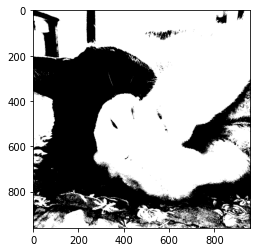

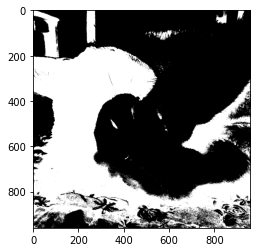

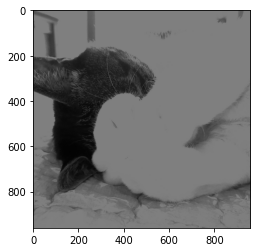

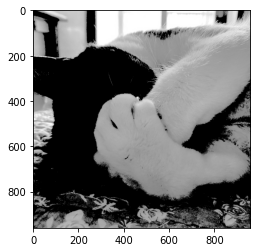

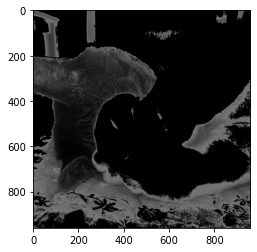

In [5]:
# 다섯가지 방법 테스트
img = cv2.imread('/content/drive/MyDrive/opencv/cat.jpeg', cv2.IMREAD_GRAYSCALE)
images = []

ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for img in images:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

적응 임계점 처리 함수

cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C) 

- max_value : 임계 값을 넘으면 적용할 값
- adaptive_method: 임계 값을 결정하는 계산 방법

ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정

ADAPTIVE_THRESH_GAUSSIAN_C

- type: 임계점을 처리하는 방식
- block_size : 임계 값을 적용할 영역의 크기
- C : 평균이나 가중 평균에서 차감할 값

ADAPTIVE_THRESH_MEAN_C : 적용할 픽셀(x,y)를 중심으로 하는 block size * block size 안에 있는 픽셀 값의 평균에서 C를 뺀 값을 임계점으로 설정

ADAPTIVE_THRESH_GAUSSIAN_C : 적용할 픽셀(x,y)를 중심으로 하는 block size * block size 안에 있는 Gaussian 윈도우 기반의 가중치들의 합에서 C를 뺀 값을 임계점으로 설정

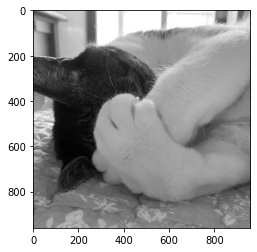

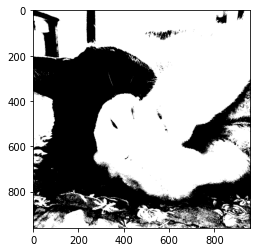

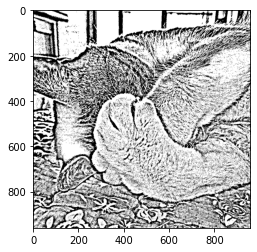

In [13]:
# 적응 임계점 처리 함수 사용
img = cv2.imread('/content/drive/MyDrive/opencv/cat.jpeg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()